<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/0.0.2/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -U pip setuptools

In [ ]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubun

In [ ]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-pol is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libleptonica-dev is already the newest version (1.75.3-3).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information...

In [ ]:
pip install pdf2image

In [ ]:
pip install pytesseract 

In [ ]:
pip install autocorrect

In [ ]:
pip install pyMorfologik

In [ ]:
pip install spacy

In [ ]:
pip install https://storage.googleapis.com/spacy-pl-public-models/pl_model-1.0.0.tar.gz

  Using cached https://storage.googleapis.com/spacy-pl-public-models/pl_model-1.0.0.tar.gz (478.5 MB)


In [ ]:
pip install https://github.com/spacy-pl/spaCy/archive/pl-release/lemmatizer-tagmap-and-tests.zip

  Using cached https://github.com/spacy-pl/spaCy/archive/pl-release/lemmatizer-tagmap-and-tests.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmp56tsf05f Check the logs for full command output.


In [ ]:
#import spacy
#from spacy.lang.pl import Polish
#nlp = spacy.load('pl_model')

In [ ]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os
import pandas as pd
import cv2 
from pdf2image import pdfinfo_from_path,convert_from_path
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [ ]:
spell = Speller('pl')

In [136]:
def fig_prepare(image):
  
  kernel_3x3 = np.ones((3, 3), np.float32) / 9

  kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

  blurred = cv2.filter2D(image, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  lower=np.array([0,0,0])
  upper=np.array([100,100,100])

  mask = cv2.inRange(sharpened, lower, upper)
  
  return 255-mask

In [ ]:
def text_from_file(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [ ]:
def text_from_image(image):
  image_correct=image
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [ ]:
import re
def hasNumbers(inputString):
   return any(char.isdigit() for char in inputString)

In [121]:
def mask_from_cropped(cropped):
          kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
          dilated = cv2.dilate(cropped, kernel)
          eroded=cv2.erode(dilated,kernel)

          kernel_3x3 = np.ones((3, 3), np.float32) / 9

          kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

          blurred = cv2.filter2D(eroded, -1, kernel_3x3)
          sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

          blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
          sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

          

          lower=np.array([0,0,0])
          upper=np.array([130,130,130])

          return cv2.inRange(sharpened, lower, upper)

In [173]:
def countrurs(gray,ythresh): 
  thresh=255-gray
  # use morphology erode to blur horizontally
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
  morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

  figure(figsize=(20,50))
  plt.imshow(morph)
  plt.show() 

  # use morphology open to remove thin lines from dotted lines
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
  morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

  figure(figsize=(20,50))
  plt.imshow(morph)
  plt.show() 

  # find contours
  cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

  # find the topmost box

  for c in cntrs:
        box = cv2.boundingRect(c)
        x,y,w,h = box
        if y < ythresh:
            topbox = box
            ythresh = y
  return cntrs[::-1],topbox

6
cropped number Załącznik 3922

 

mask number PA SG: SERA:

cropped text Załącznik 3922

 

mask text PA SG: SERA:



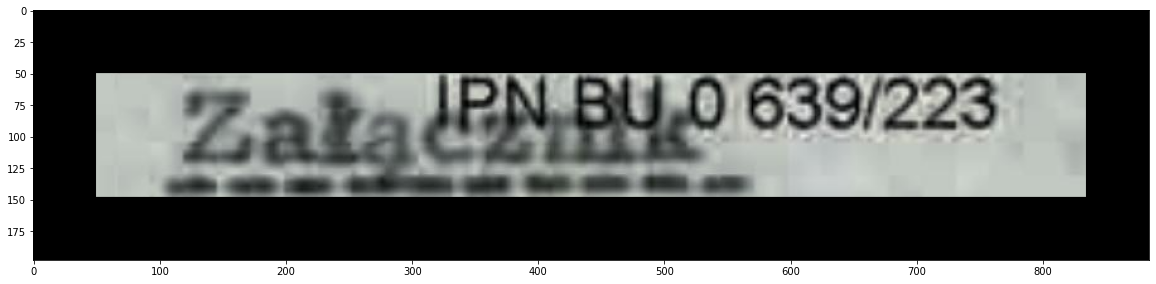

7
cropped number  

mask number STRUKTURA I WYKONANIE BUDŻETÓW

cropped text  

mask text STRUKTURA I WYKONANIE BUDŻETÓW



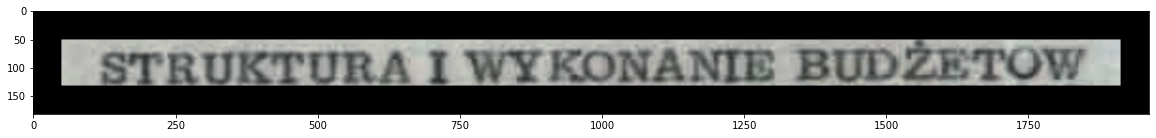

9
cropped number 
mask number E co notaadandnadandaninadkanikonchaniaabonudie)

cropped text 
mask text E co notaadandnadandaninadkanikonchaniaabonudie)



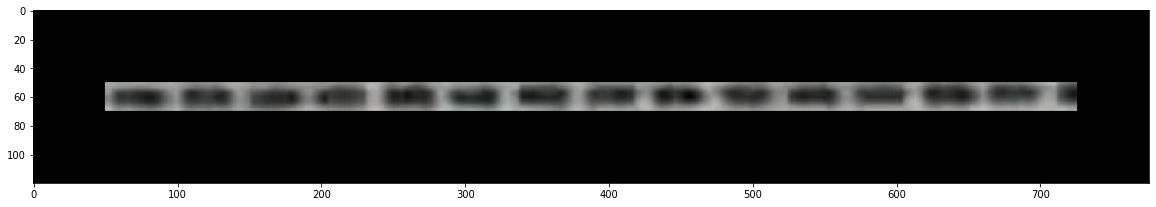

11
cropped number  

KATOLICKICH

mask number KATOLICKICH ORGANIZACJI SPOŁECZNYCH :

cropped text  

KATOLICKICH

mask text KATOLICKICH ORGANIZACJI SPOŁECZNYCH :



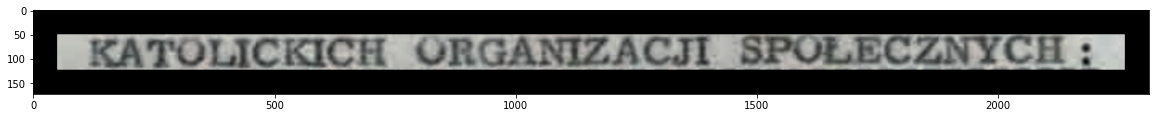

13
cropped number  

mask number WODNE SCSZYDZÓ,

cropped text  

mask text WODNE SCSZYDZÓ,



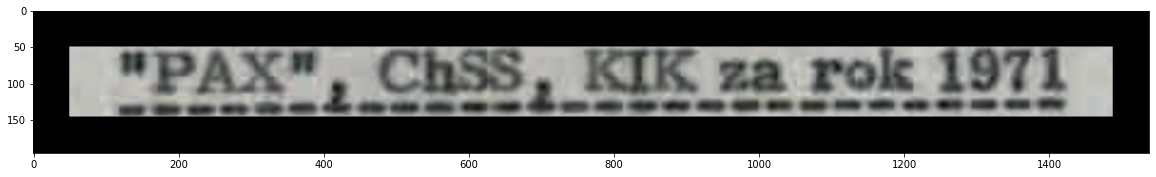

15
cropped number  

 

wę m R m m a z e i A e a A A A M MA WM.

 

mask number 
cropped text  

 

wę m R m m a z e i A e a A A A M MA WM.

 

mask text 


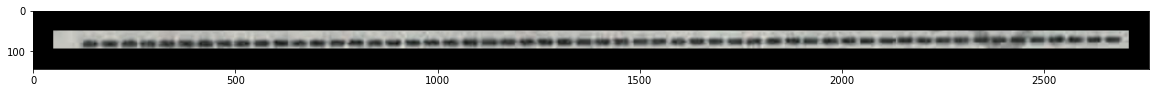

17
cropped number  

mask number STOWARZYSZENIE "PAX"

cropped text  

mask text STOWARZYSZENIE "PAX"



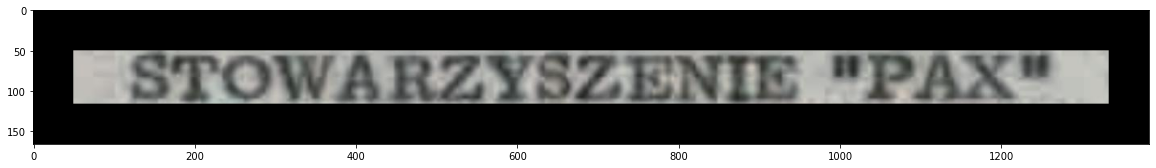

19
cropped number Realizacja budżetuv za rok 1971:

 

mask number Realizacja budżetu za rok 1971:

cropped text Realizacja budżetuv za rok 1971:

 

mask text Realizacja budżetu za rok 1971:



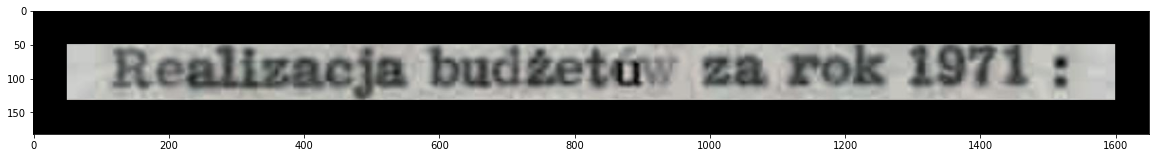

21
cropped number  

ziałalność statutowa

mask number - działalność statutowa

cropped text  

ziałalność statutowa

mask text - działalność statutowa



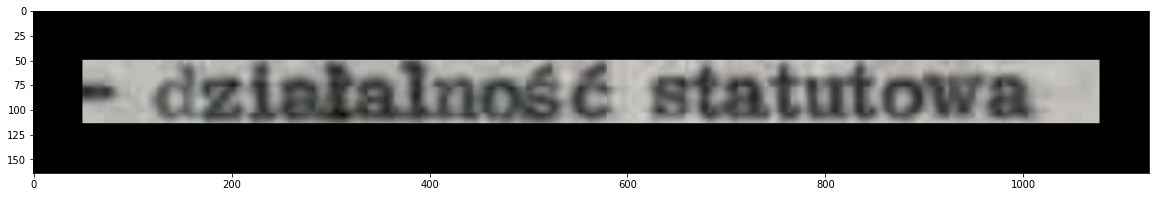

22
cropped number  

- pokrycie straty prasy i wydawnictw - 26.650,000,= zł,

mask number - pokrycie straty prasy i wydawnictw - 28.680,000,- żł.

cropped text  

- pokrycie straty prasy i wydawnictw - 26.650,000,= zł,

mask text - pokrycie straty prasy i wydawnictw - 28.680,000,- żł.



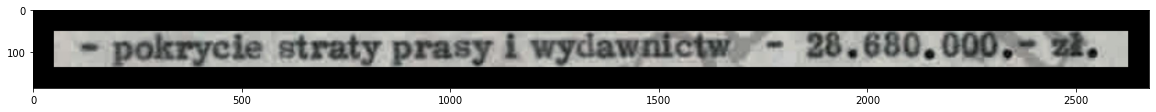

26
cropped number __ razem: 65.400, 000,

 

mask number MOLI A _ 65.400.000, : i

cropped text __ razem: 65.400, 000,

 

mask text MOLI A _ 65.400.000, : i



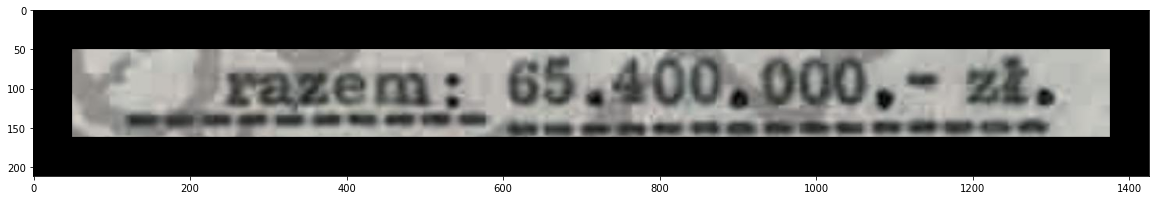

28
cropped number Struktura budżetu :

 

mask number Struktura budżetu :

cropped text Struktura budżetu :

 

mask text Struktura budżetu :



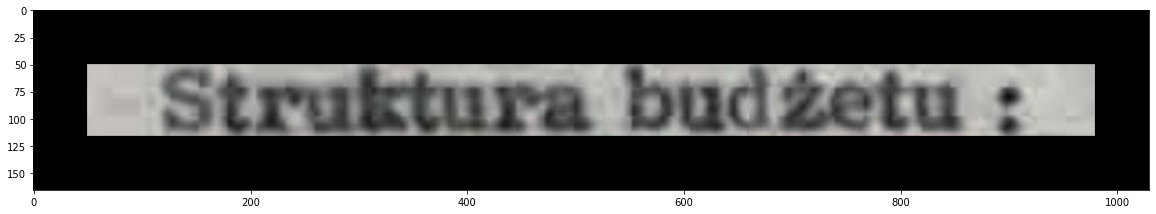

31
cropped number 1. Płace / osobowy. fundusz płac,

 

mask number 1. Płace / osobowy fundusz płac,

cropped text 1. Płace / osobowy. fundusz płac,

 

mask text 1. Płace / osobowy fundusz płac,



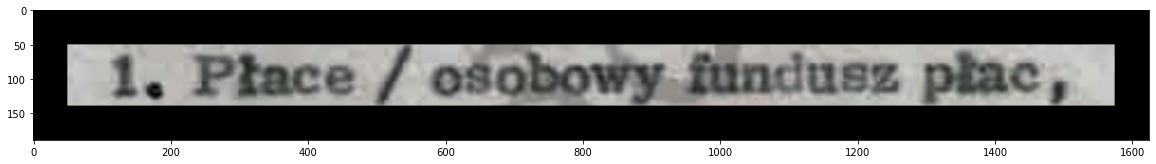

32
cropped number narzuty, bezosobowy fundusz

 

mask number narzuty, bezogobowy fundusz

cropped text narzuty, bezosobowy fundusz

 

mask text narzuty, bezogobowy fundusz



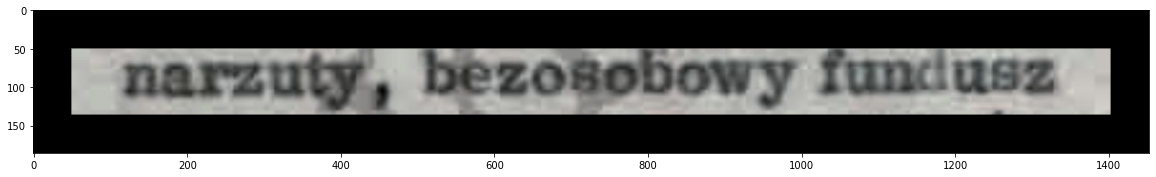

33
cropped number łac, Fundusz honorariów
7

 

mask number płac, Fumdusz honorariów /

cropped text łac, Fundusz honorariów
7

 

mask text płac, Fumdusz honorariów /



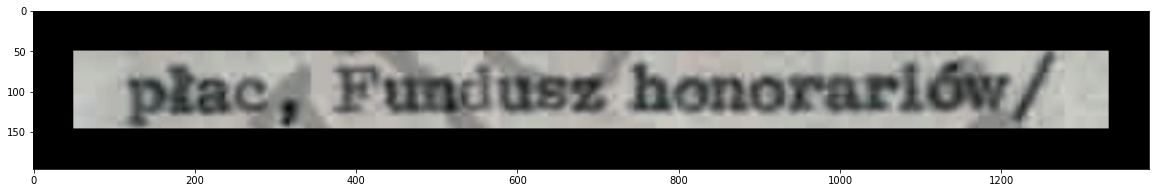

34
cropped number  

mask number - 19.305,000,7 zł,

cropped text  

mask text - 19.305,000,7 zł,



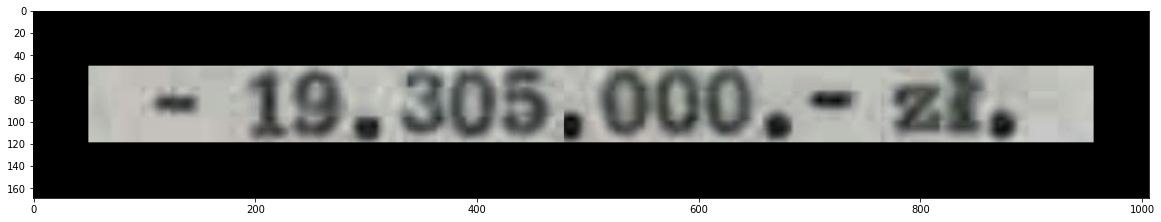

36
cropped number  

mask number 273.000." zł,

cropped text  

mask text 273.000." zł,



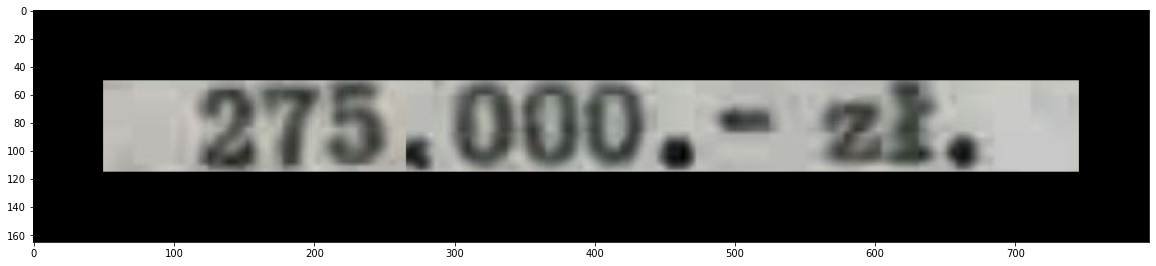

37
cropped number 2. Fundusz nagród

 

mask number 2. Fundusz nagród

cropped text 2. Fundusz nagród

 

mask text 2. Fundusz nagród



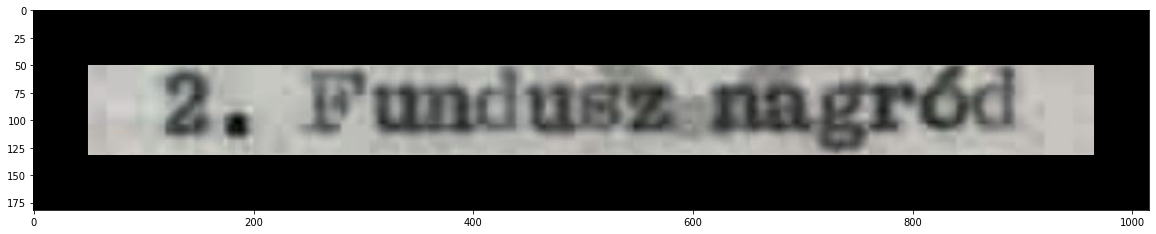

39
cropped number  

- 2.900.,000,7 Zł,

mask number - 2.900.000.*- zł,

cropped text  

- 2.900.,000,7 Zł,

mask text - 2.900.000.*- zł,



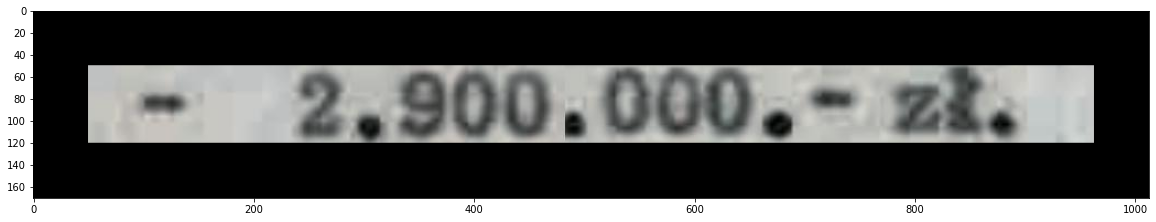

40
cropped number J, Podróże służbowe

 

mask number 3. Podróże służbowe i delegacje

cropped text J, Podróże służbowe

 

mask text 3. Podróże służbowe i delegacje



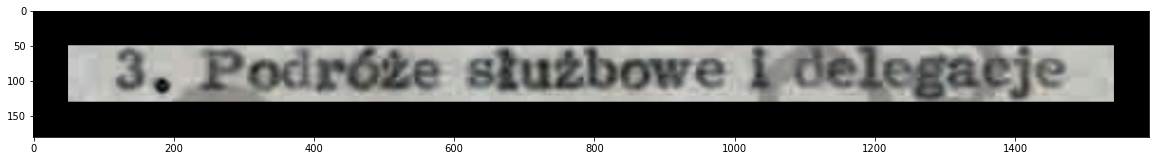

41
cropped number 4. Koszty biurowe/ utrzymani:

 

mask number -4. Koszty biurowe/ utrzyn

 

cropped text 4. Koszty biurowe/ utrzymani:

 

mask text -4. Koszty biurowe/ utrzyn

 



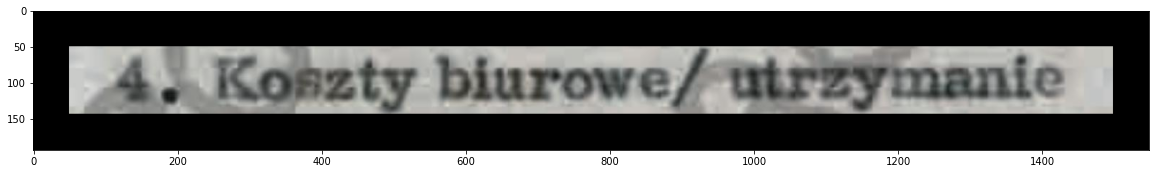

42
cropped number pomieszczeń „remonty bieżąc”

 

mask number pomieszczeń, remonty bieżąc-

cropped text pomieszczeń „remonty bieżąc”

 

mask text pomieszczeń, remonty bieżąc-



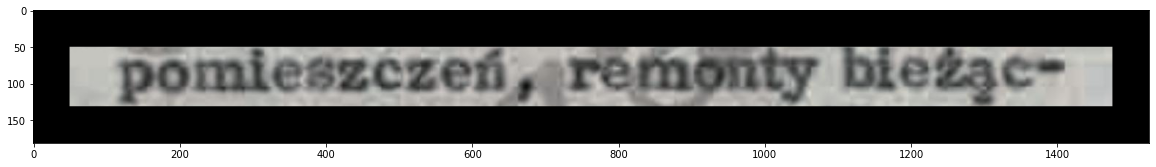

43
cropped number ce i innę świadczenia /

 

mask number - ce 1 lnnę świadczenia /

cropped text ce i innę świadczenia /

 

mask text - ce 1 lnnę świadczenia /



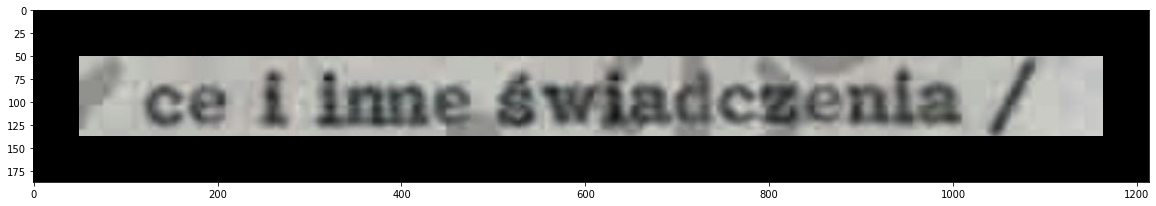

44
cropped number  

mask number CUD PUNPRŁ

cropped text  

mask text CUD PUNPRŁ



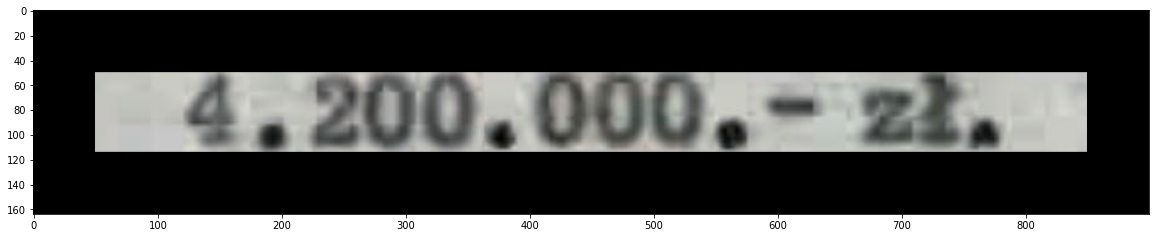

45
cropped number  

- 1,600.000.,7 zł,

mask number = | a L[ŁI8R LISA i 430

cropped text  

- 1,600.000.,7 zł,

mask text = | a L[ŁI8R LISA i 430



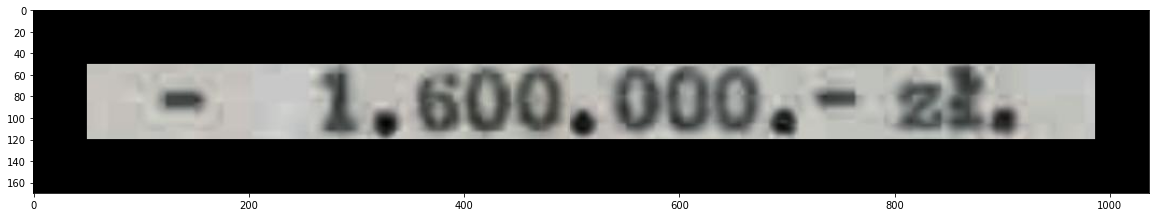

46
cropped number  

mask number "8. Transport

cropped text  

mask text "8. Transport



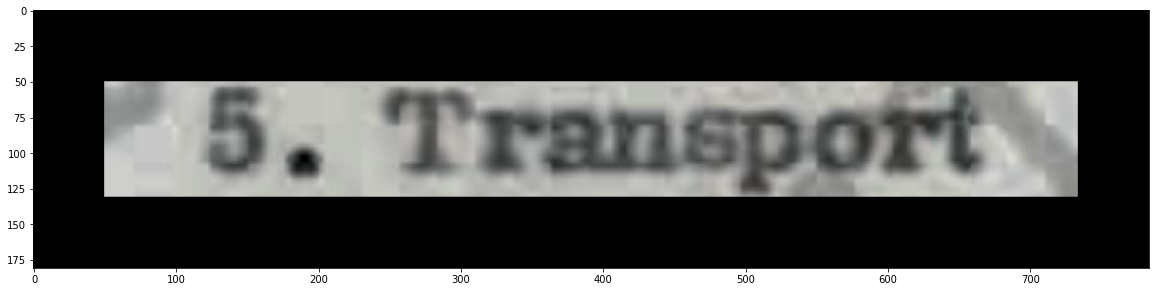

48
cropped number  

mask number 150.000." zł.

cropped text  

mask text 150.000." zł.



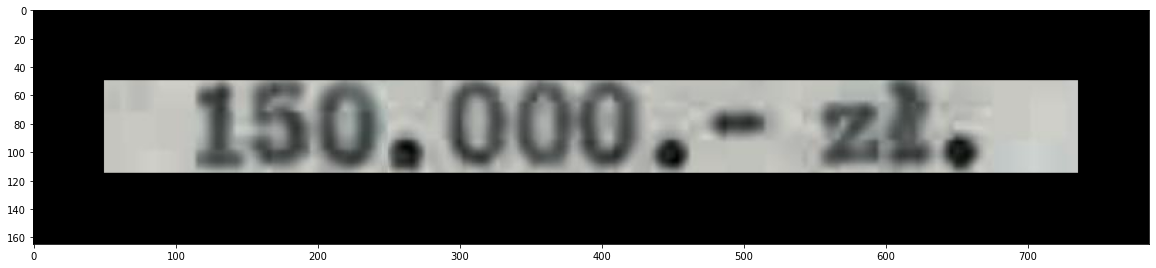

49
cropped number  

6. Gimnazjam św, Augustyna

mask number 6. Gimaaszjam św, Augustyna

cropped text  

6. Gimnazjam św, Augustyna

mask text 6. Gimaaszjam św, Augustyna



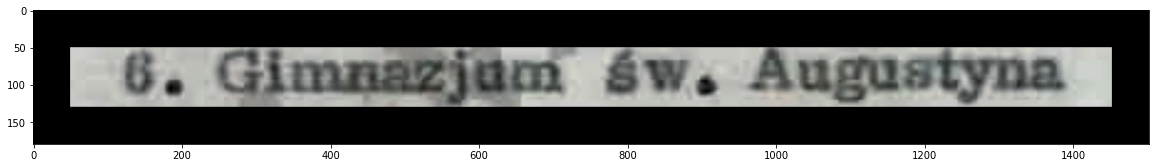

51
cropped number  

7. Działalność społ.-polityczna

mask number 7. Działalność społ."polityczna

cropped text  

7. Działalność społ.-polityczna

mask text 7. Działalność społ."polityczna



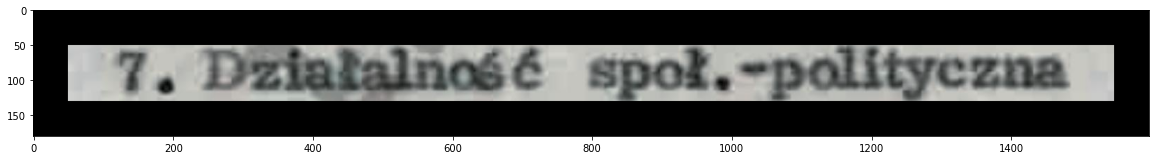

52
cropped number / komierencje, kursy, zjazdy,

 

mask number  

/ konferencje, kursy, zjazdy,

cropped text / komierencje, kursy, zjazdy,

 

mask text  

/ konferencje, kursy, zjazdy,



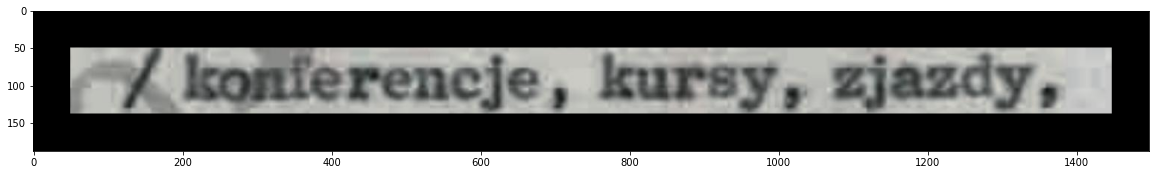

53
cropped number zespoły, akcje, działalność

 

mask number ' zespoły, akcje, działalność

cropped text zespoły, akcje, działalność

 

mask text ' zespoły, akcje, działalność



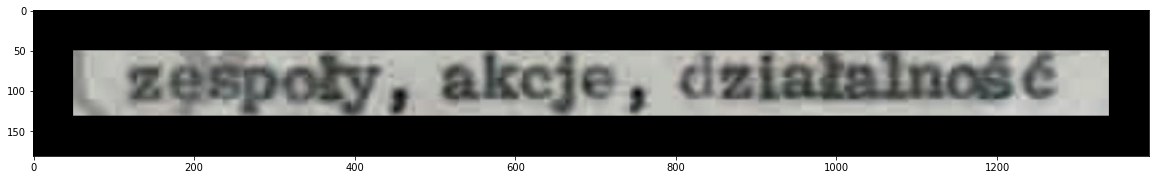

54
cropped number zagraniczna/

mask number  zagraniczna/

cropped text zagraniczna/

mask text  zagraniczna/



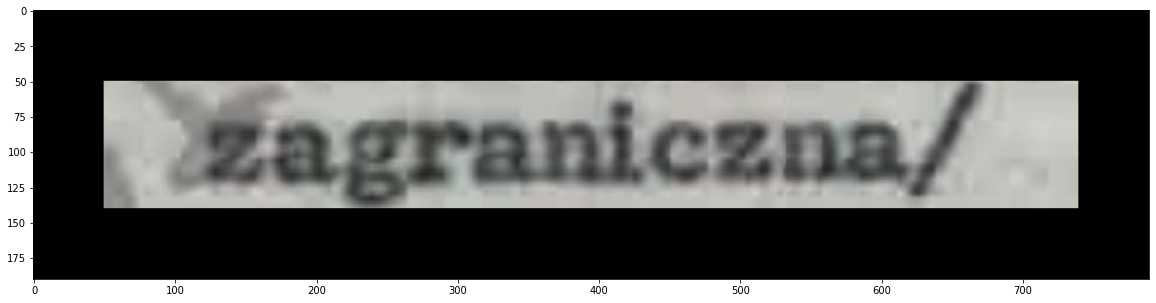

55
cropped number Ó a 240, 000, a ZŁ.

 

mask number 8.246,000,- zł.

cropped text Ó a 240, 000, a ZŁ.

 

mask text 8.246,000,- zł.



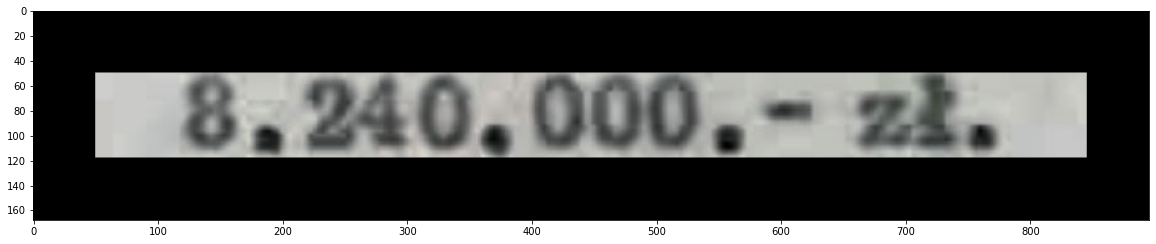

56
cropped number r

6, Pokrycie straty prasy i wyda”

 

mask number 8, Pokrycie straty prasy £ wyda”

cropped text r

6, Pokrycie straty prasy i wyda”

 

mask text 8, Pokrycie straty prasy £ wyda”



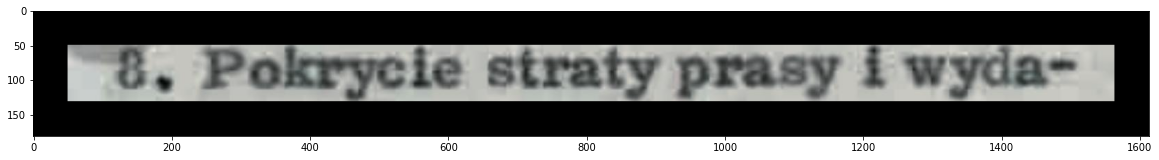

57
cropped number  

28.680,000.7 zł,

mask number - 28.680,000.- zł.

cropped text  

28.680,000.7 zł,

mask text - 28.680,000.- zł.



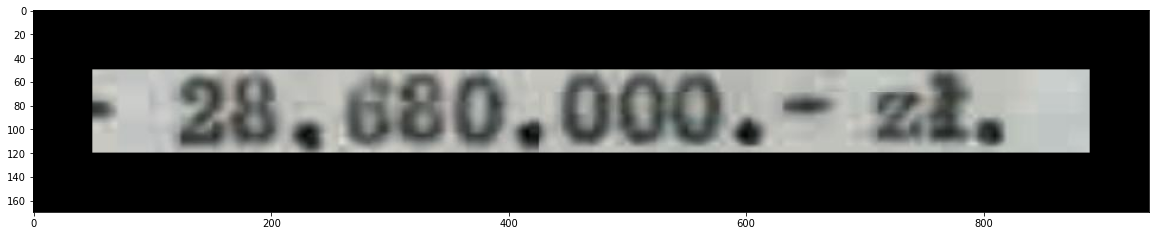

58
cropped number wnictw

mask number wnictw

cropped text wnictw

mask text wnictw



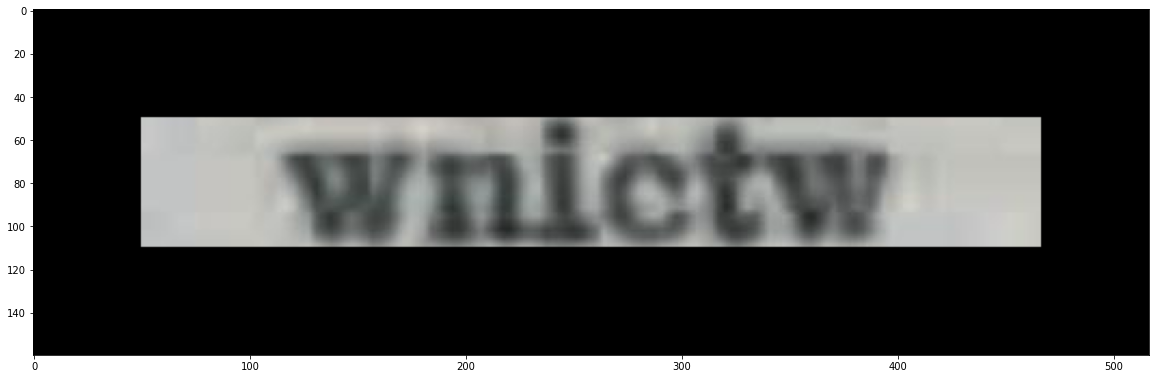

60
cropped number  

50,000, zł,

mask number 10) M IWA ng zł,

cropped text  

50,000, zł,

mask text 10) M IWA ng zł,



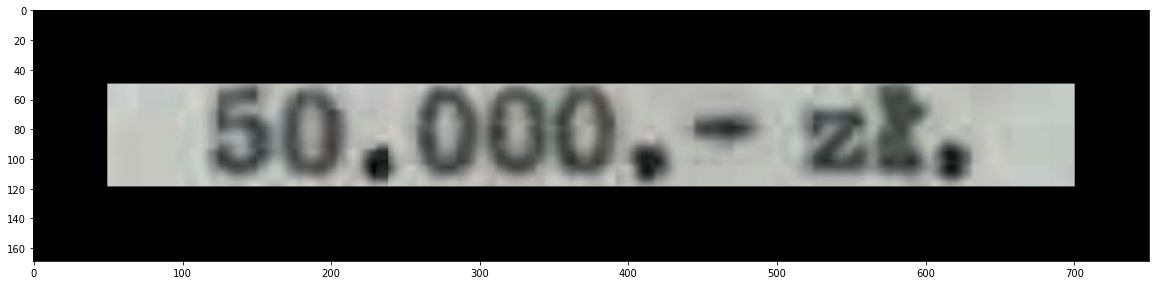

61
cropped number  

9. Podatki, opłaty

mask number 9. Podatki, opłaty

cropped text  

9. Podatki, opłaty

mask text 9. Podatki, opłaty



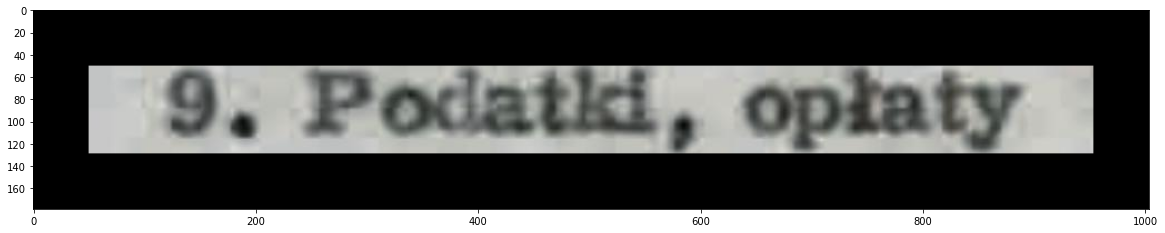

65
cropped number  

65.400,000,"zŁ,

mask number 65 .400.000."zł.

cropped text  

65.400,000,"zŁ,

mask text 65 .400.000."zł.



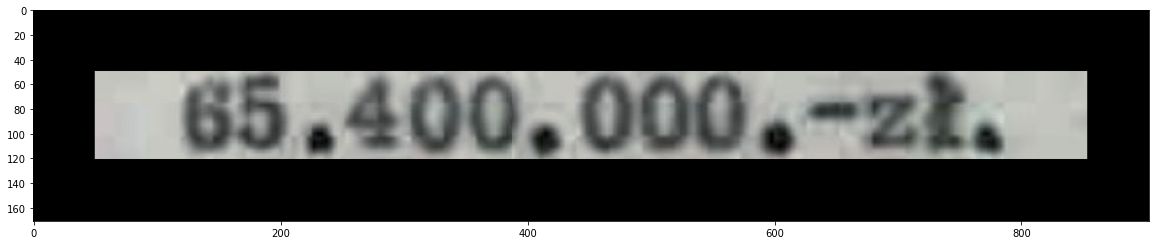

66
cropped number  

ea >

mask number razem.

cropped text  

ea >

mask text razem.



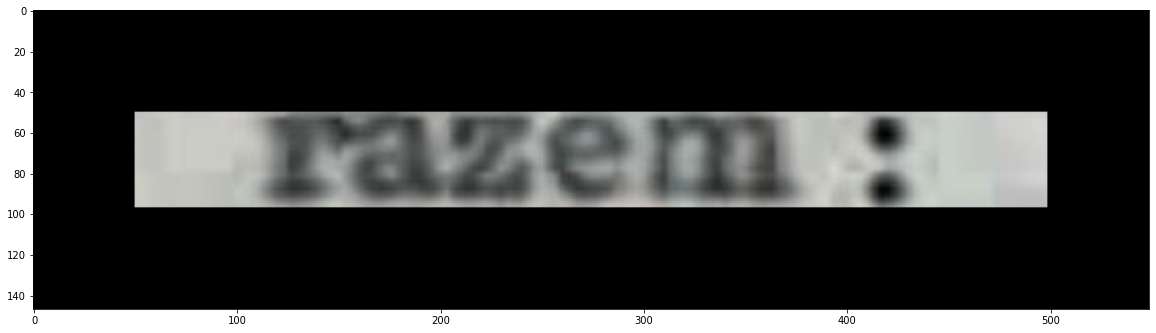

67
cropped number 
mask number Ea local lidl oils ca odno dalam dn dicazadkon dioondozacia)

cropped text 
mask text Ea local lidl oils ca odno dalam dn dicazadkon dioondozacia)



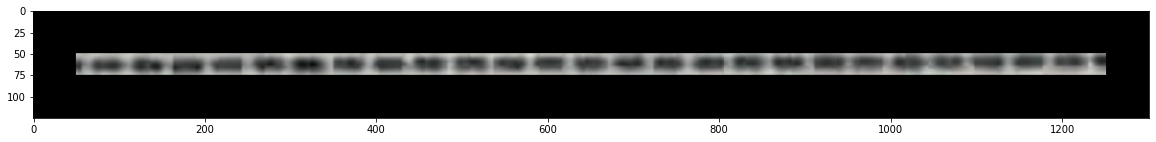

70
cropped number 
mask number I dbała banalna Ea niłkanai coil cui czadiac cnota czci

cropped text 
mask text I dbała banalna Ea niłkanai coil cui czadiac cnota czci



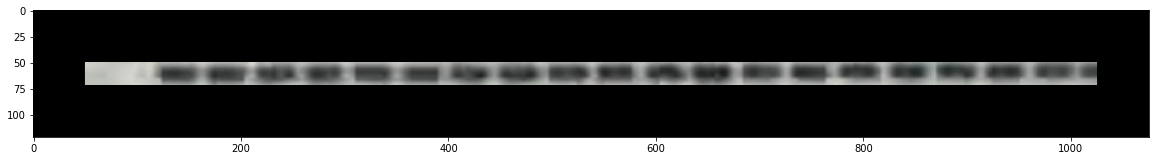

71
cropped number Budżet równoważą :

 

mask number PB 4 CCC IA

cropped text Budżet równoważą :

 

mask text PB 4 CCC IA



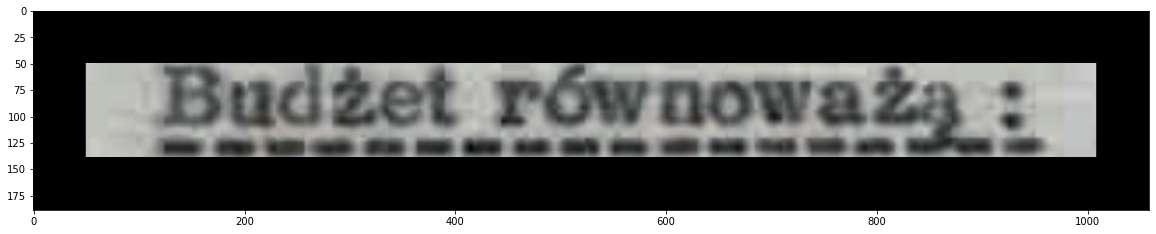

72
cropped number - wpłata z nadwyżki z całokształtu

 

mask number - wpłata z nadwyżki z całokształtu

cropped text - wpłata z nadwyżki z całokształtu

 

mask text - wpłata z nadwyżki z całokształtu



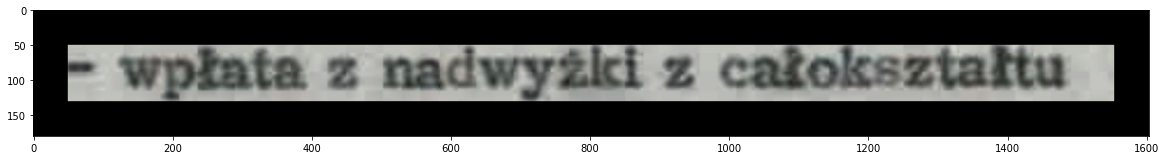

73
cropped number  

mask number - 36.520.000. zł,

cropped text  

mask text - 36.520.000. zł,



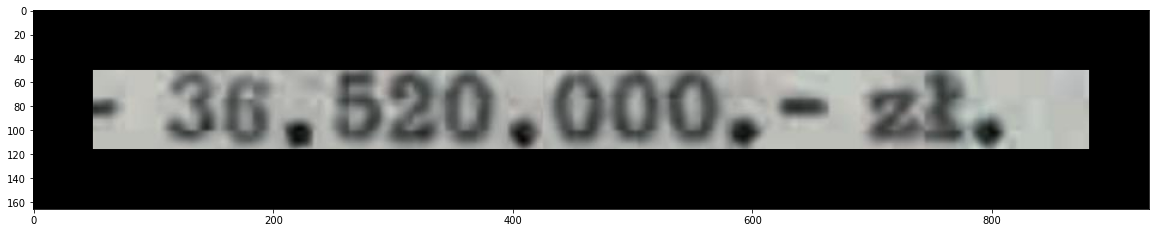

74
cropped number ziałalności g

 

mask number działalności gospodarczej ZŹ2G

cropped text ziałalności g

 

mask text działalności gospodarczej ZŹ2G



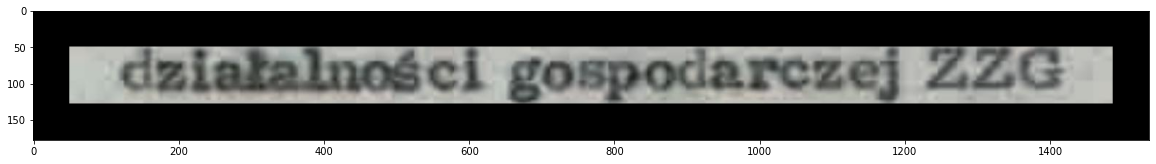

75
cropped number 10 z 348

mask number [E
GZ)

|

cropped text 10 z 348

mask text [E
GZ)

|



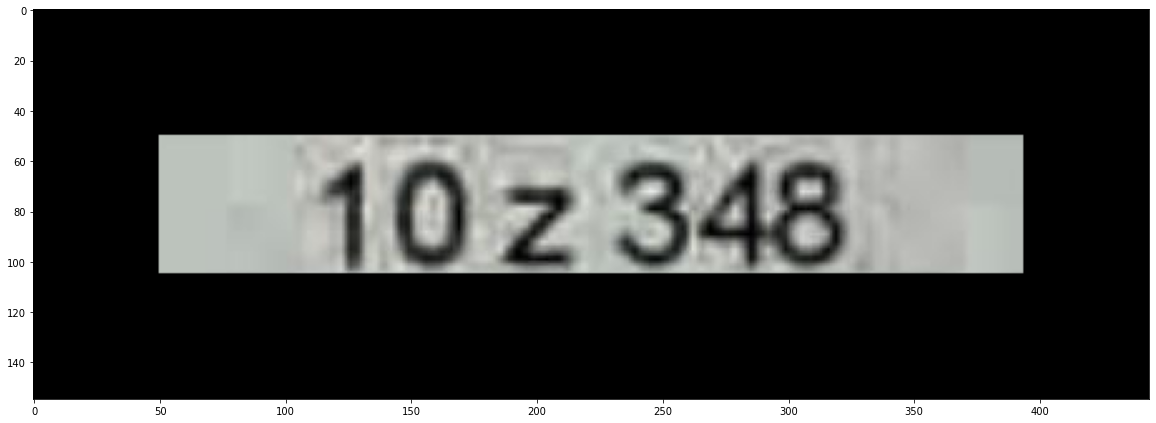

In [131]:
file='drive/MyDrive/kuba/resolution500/fig1.jpg'
image = cv2.imread(file)
gray=fig_prepare(image)

image = cv2.imread(file)
result = gray.copy()
ythresh=1000
cntrs,topbox=countrurs(gray,ythresh)
#cntrs=cntrs[::-1]
i=0
figures=[]
text=[]
for c in cntrs:
      box = cv2.boundingRect(c)
      if box != topbox:
        i=i+1
        if i>=0:
          x,y,w,h = box
          cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
          cropped = image[y:y + h, x:x + w]  

          figures.append(cropped)
          text.append(image_to_string(cropped,lang='pol'))
          
          mask = mask_from_cropped(cropped)
          board=50
          cropped = cv2.copyMakeBorder( cropped, board,board, board, board,cv2.BORDER_CONSTANT)
          mask = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT)
          
          
          if re.search('[a-zA-Z]',image_to_string(cropped,lang='pol',config = r'--oem 3 --psm 3')) or re.search('[a-zA-Z]',image_to_string(mask, lang='pol',config= r'--oem 3 --psm 3')):
              
              string_dig_crop=image_to_string(cropped,lang='pol',config = r'outputbase digits')#r'--oem 3 --psm 3 outputbase digits'
              string_dig_mask=image_to_string(mask, lang='pol',config = r'outputbase digits')
              string_let_crop=image_to_string(cropped,lang='pol')#r'--oem 3 --psm 3'
              string_let_mask=image_to_string(mask, lang='pol')
              docs=[string_dig_crop,string_dig_mask,string_let_crop,string_let_mask]
              #for doc in docs:
              #  print(nlp(spell(doc)))
              #  print(doc)
                #for token in doc:
                #    if token.text in nlp.vocab and token.orth in nlp.vocab:
                #      print(token.text)
              print(i)
              print('cropped number',string_dig_crop)
              print('mask number',image_to_string(mask, lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
              print('cropped text',image_to_string(cropped,lang='pol',config = r'--oem 3 --psm 3'))
              print('mask text',image_to_string(mask, lang='pol',config= r'--oem 3 --psm 3'))
              figure(figsize=(20,50))
              plt.imshow(cropped)
              plt.show() 
        

              #figures.append(cropped)
              #text.append(image_to_string(cropped,lang='pol',config = r'--oem 3 --psm 3'))





0
1


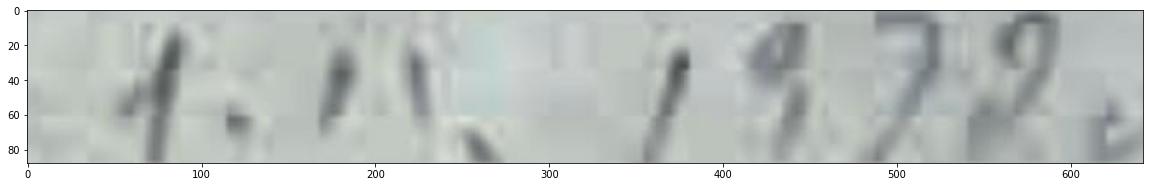

2


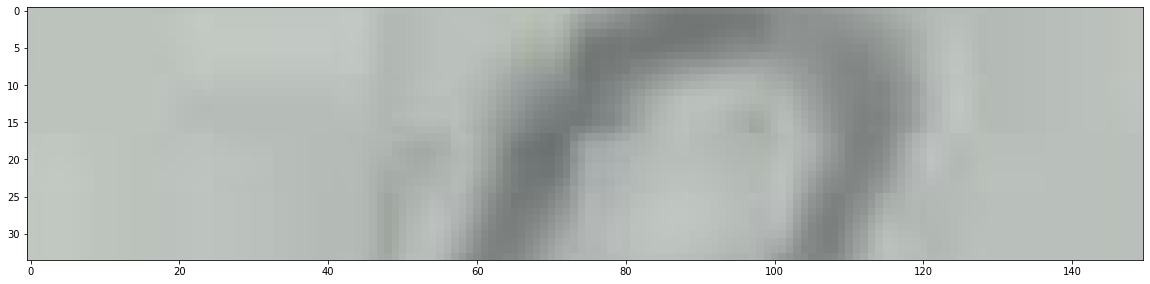

3


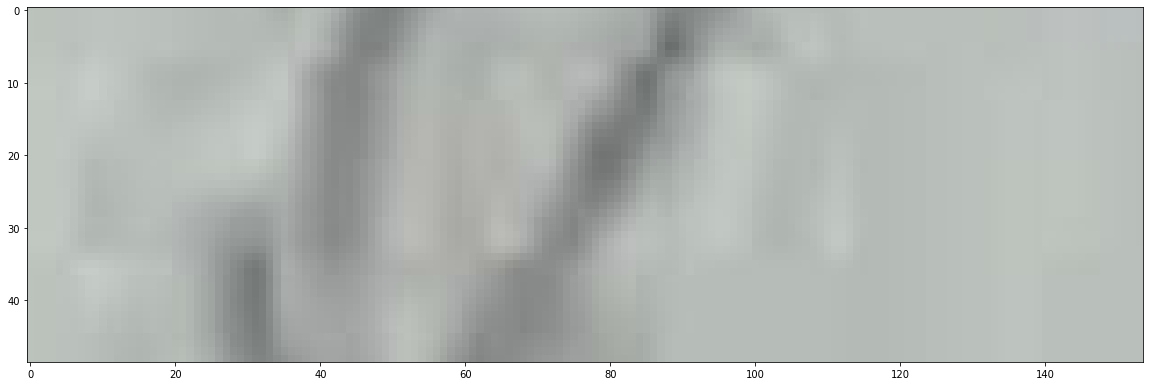

4


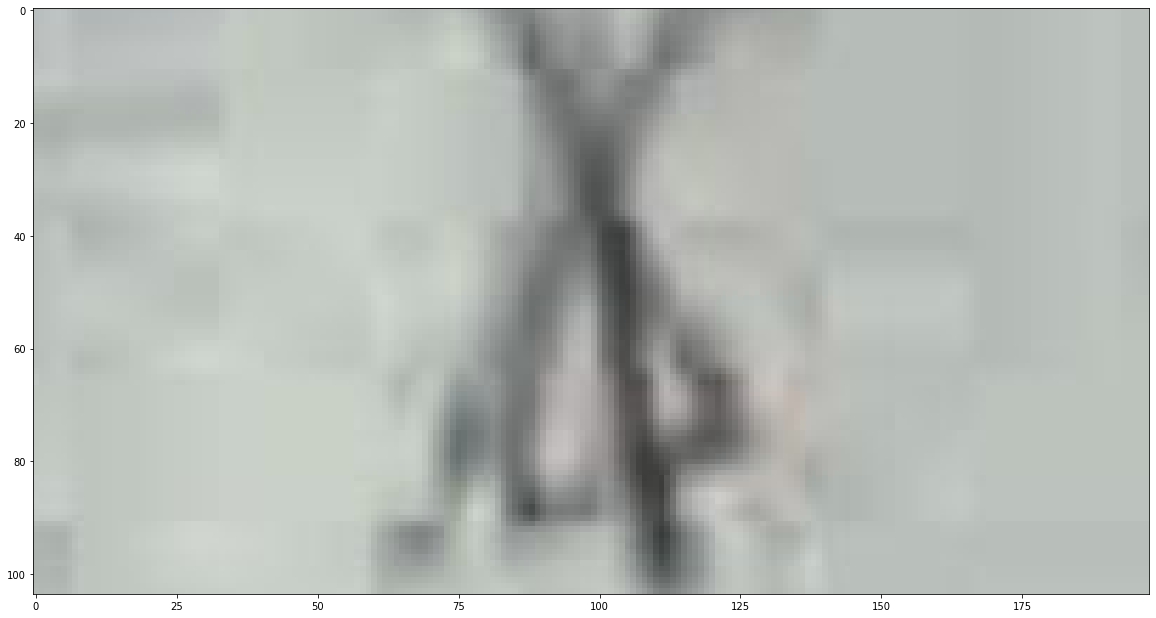

5


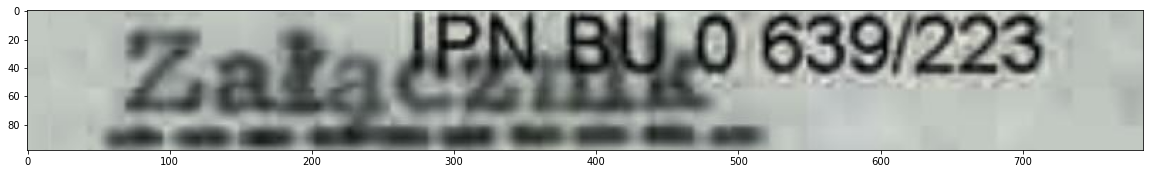

6


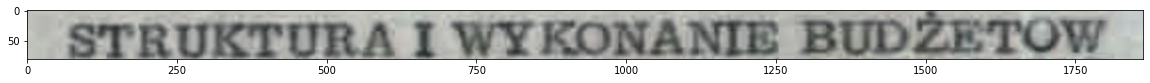

7


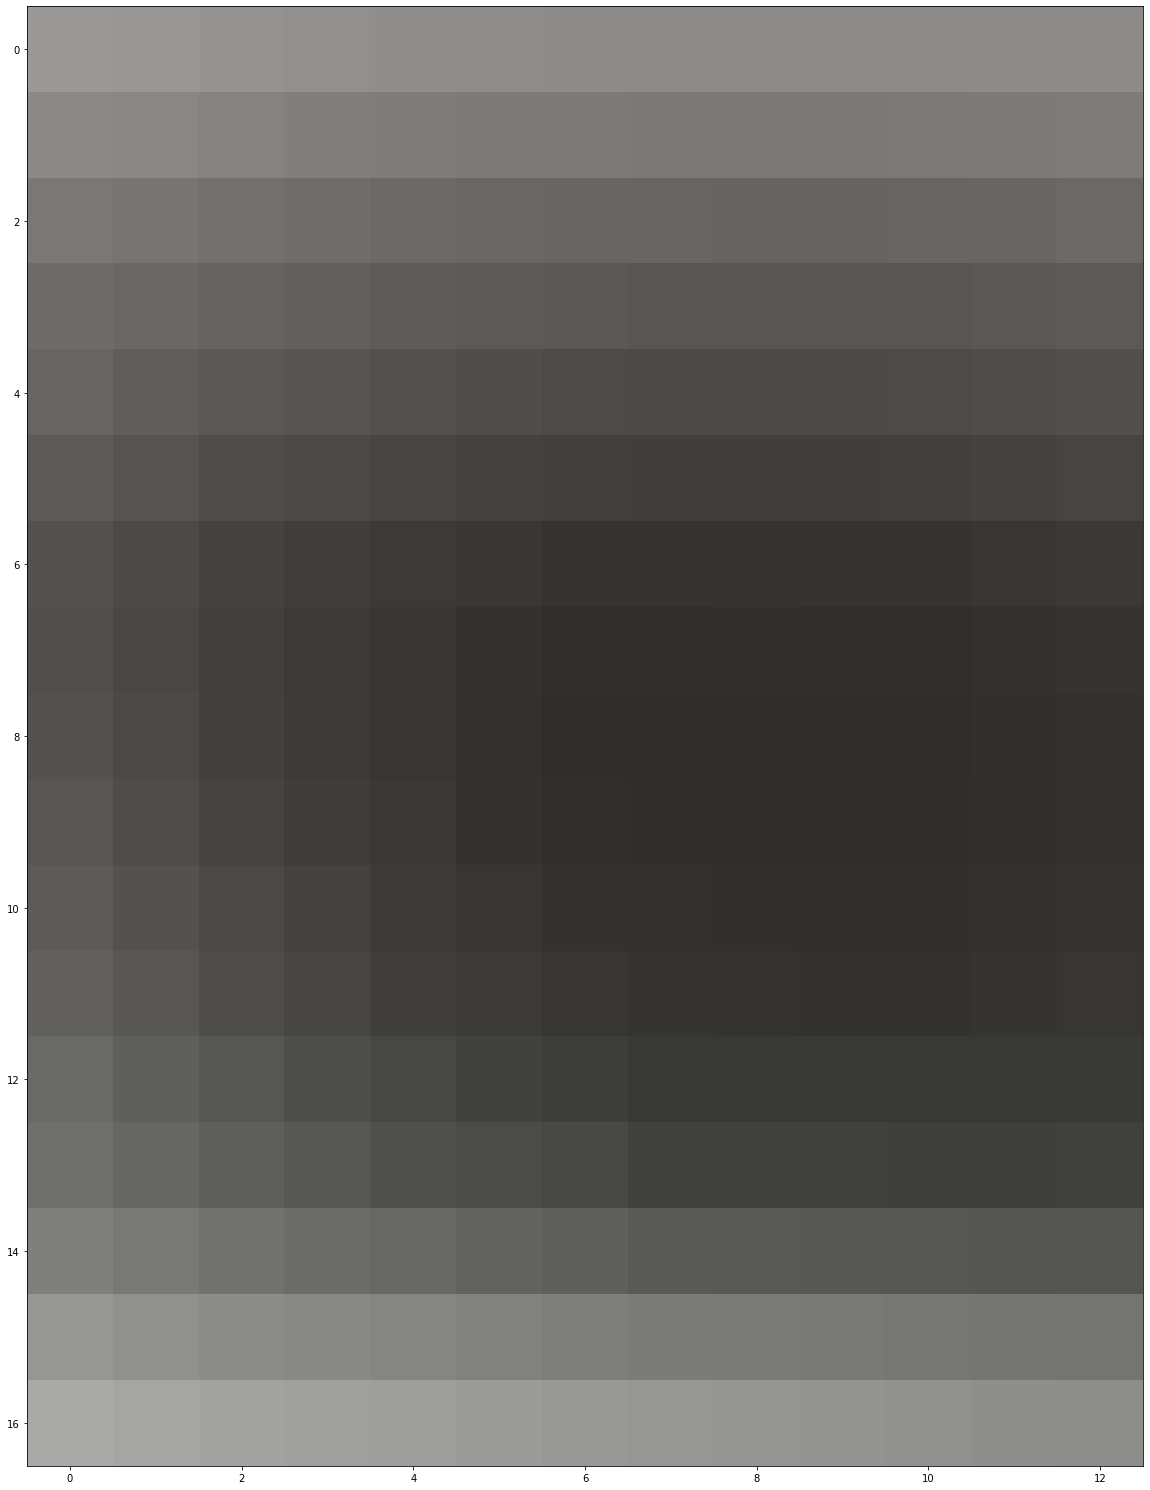

8


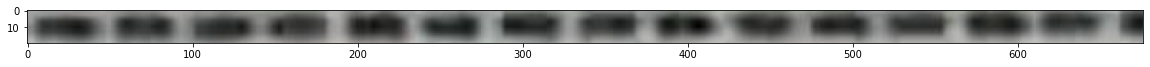

9


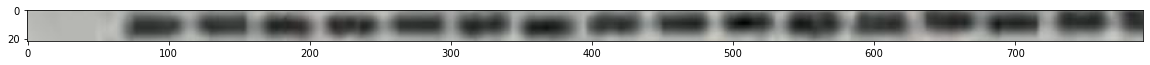

10


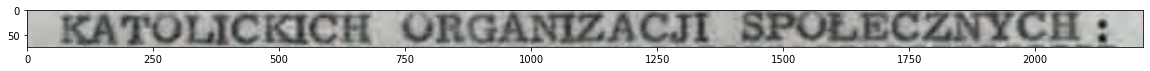

11


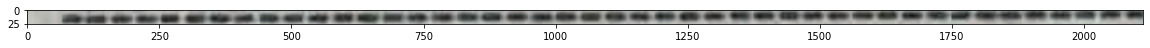

12


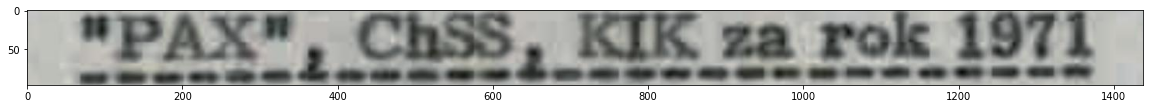

13


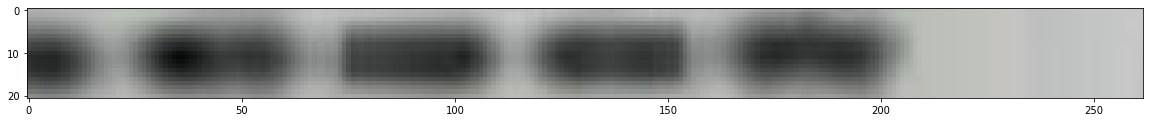

14


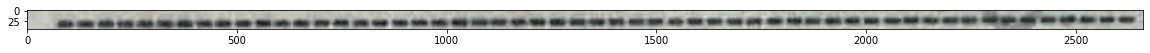

15


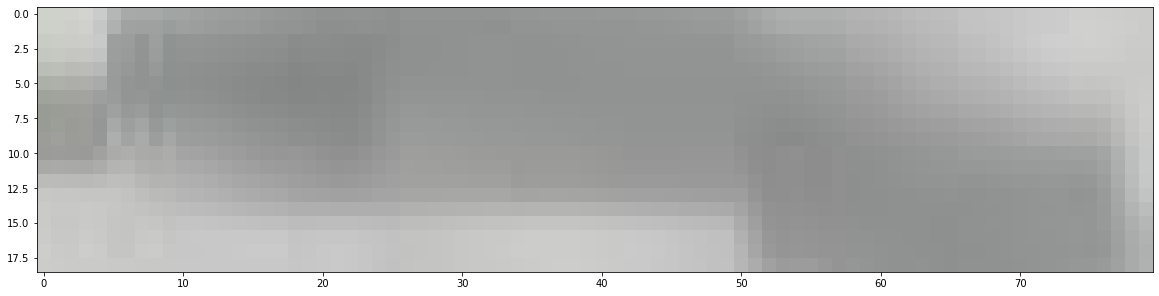

16


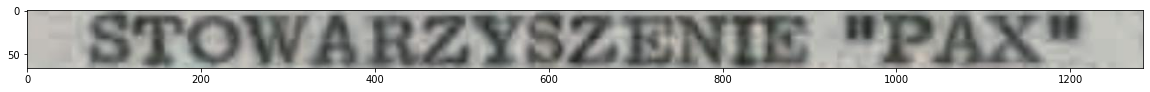

17


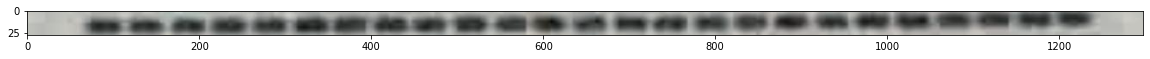

18


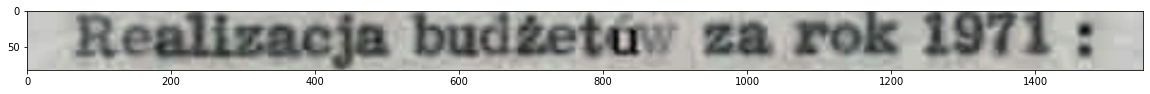

19


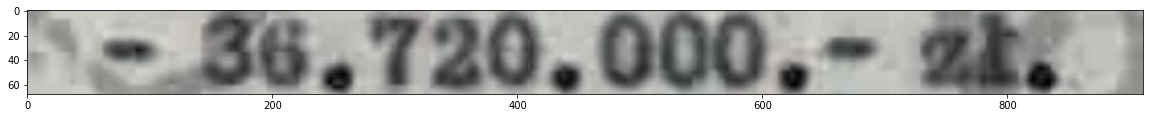

20


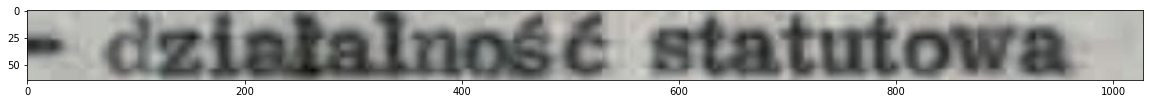

21


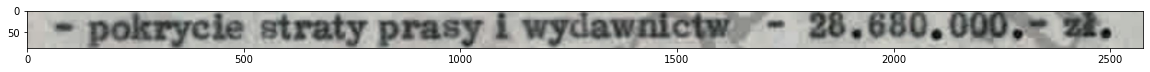

22


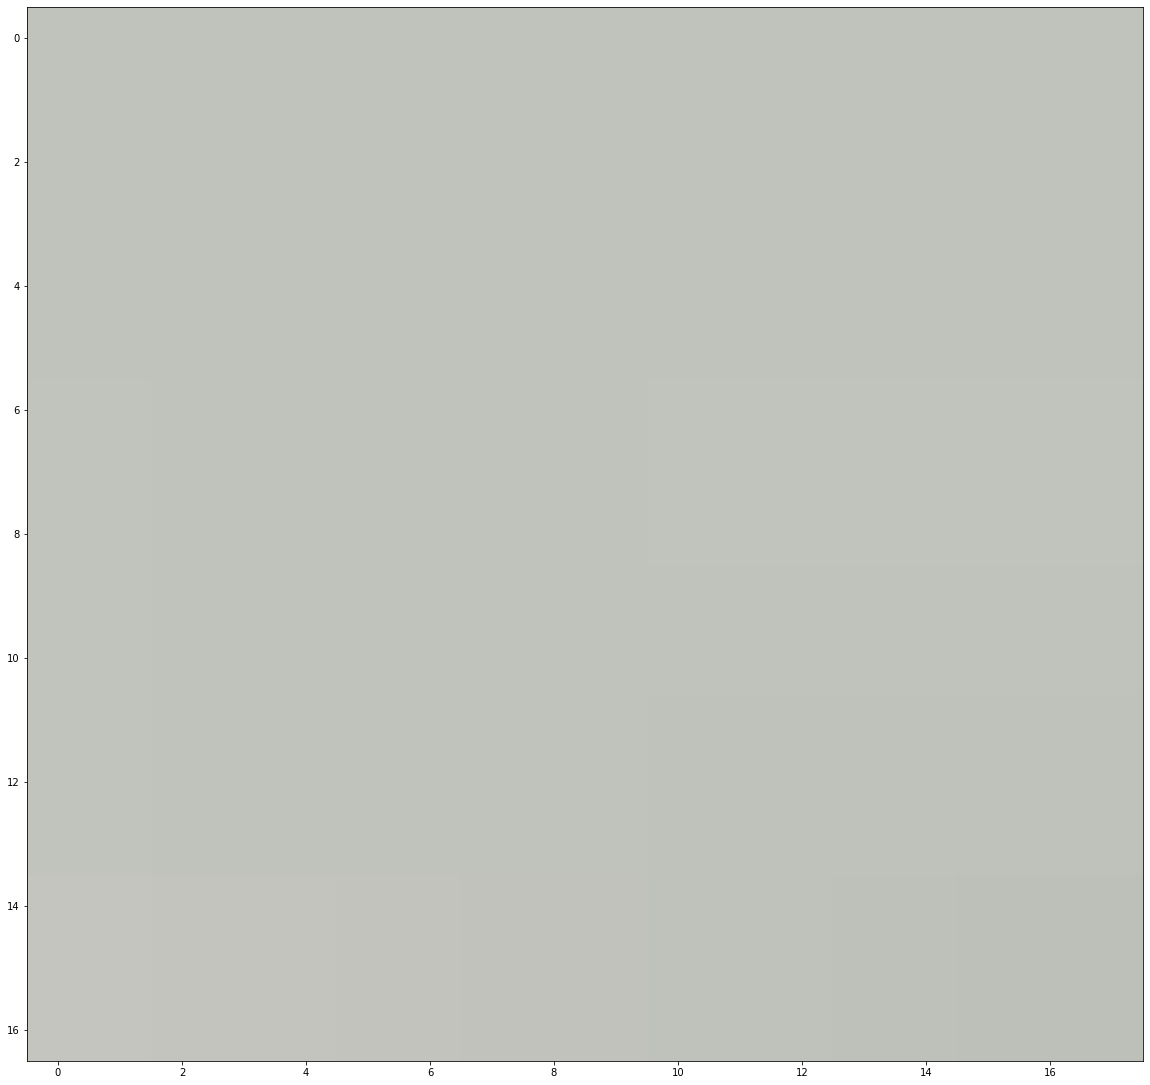

23


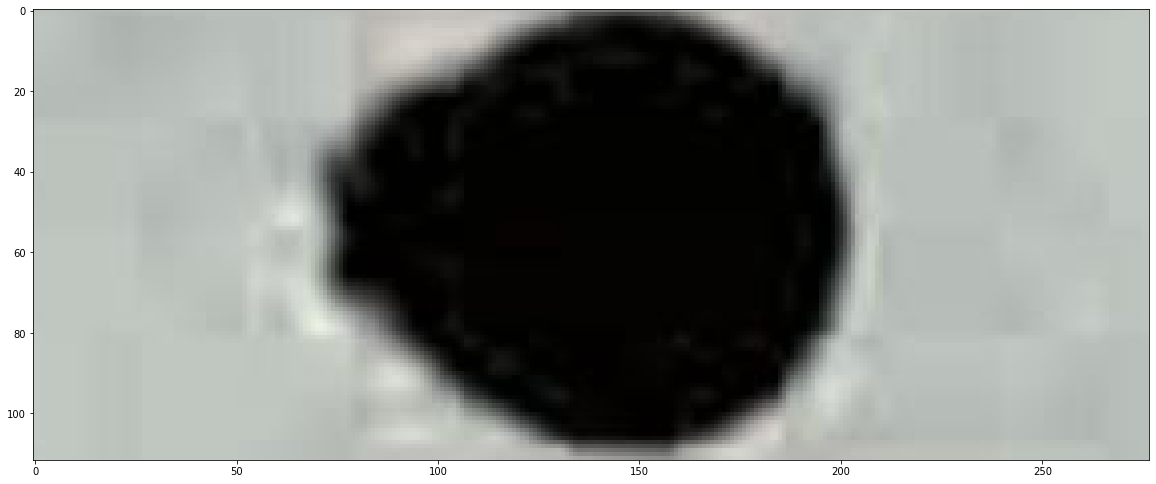

24


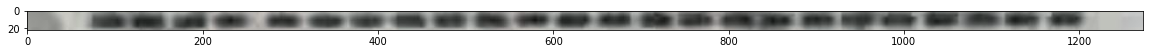

25


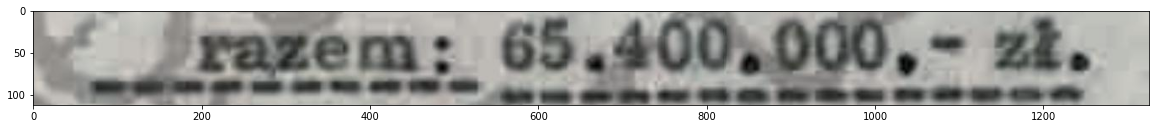

26


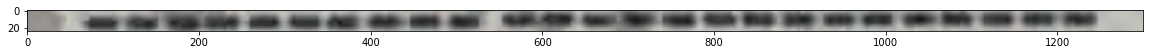

27


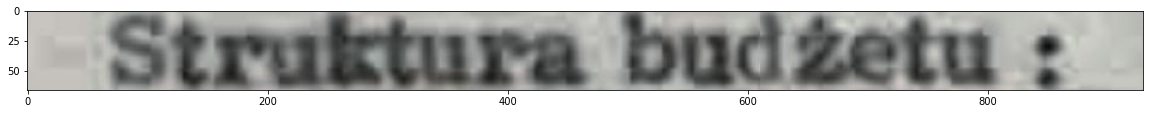

28


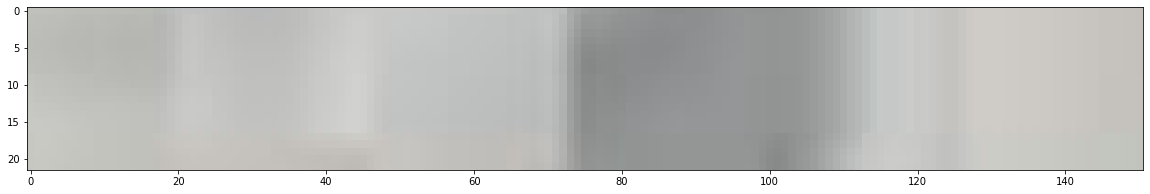

29


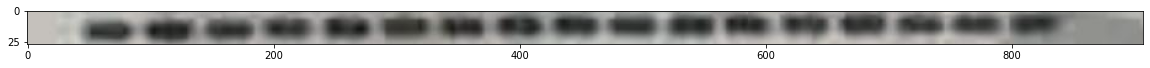

30


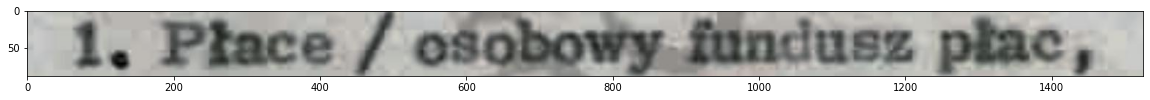

31


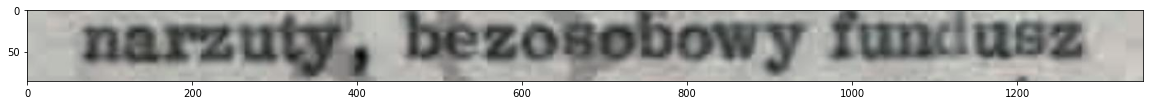

In [132]:
for i in range(0,80):
    print(i)
    if i>0:
      figure(figsize=(20,50))
      plt.imshow(figures[i])
      plt.show() 
      #broades(figures[i])
    if i>30:
      break


In [ ]:
def broades(fig):
  for board in [20]:
        print(board)
        mask = mask_from_cropped(fig)
        mask_broad = cv2.copyMakeBorder( mask, board,board, board, board,cv2.BORDER_CONSTANT)
        fig_broad = cv2.copyMakeBorder( fig, board,board, board, board,cv2.BORDER_CONSTANT)
  
        print('mask_broad',image_to_string(mask_broad,lang='pol'))
        print('mask_broad_dig',image_to_string(mask_broad,lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
        print('fig_broad_dig',image_to_string(fig_broad,lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
        figure(figsize=(20,50))
        plt.imshow(mask_broad)
        plt.show() 

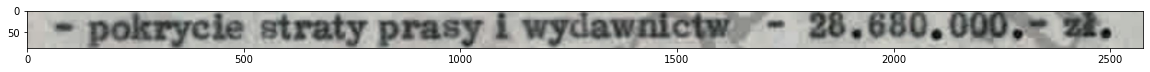

20
mask_broad = pokrycie straty prasy i wydawnictw - 28.680,0060,= zł.

mask_broad_dig = pokrycie straty prasy i wydawnictw - 28.680,0060,= zł.

fig_broad_dig  

- pokrycie straty prasy i wydawnictw - 26.650,000,” zł,



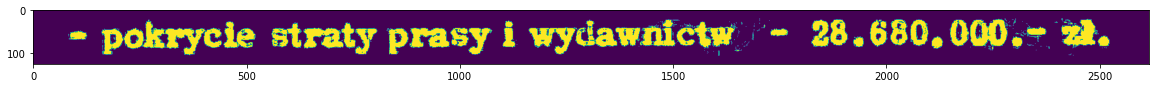

In [133]:
for i in range(0,80):
    #print(i)
    if i==21:
      figure(figsize=(20,50))
      plt.imshow(figures[i])
      plt.show() 
      broades(figures[i])
    if i>30:
      break

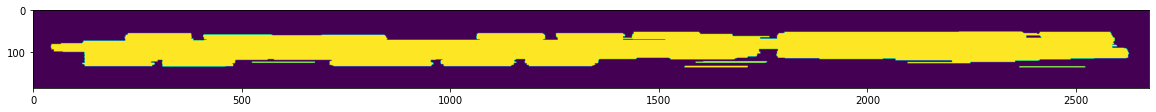

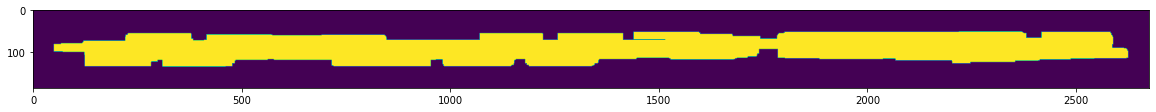

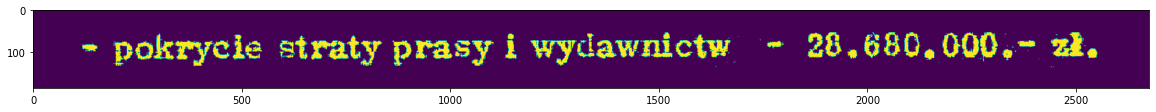

1


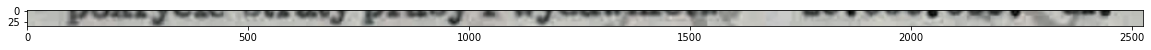

In [182]:
for i in range(0,80):
  if i==21:
    image = figures[i]
    result = figures[i].copy()

    gray=255-fig_prepare(figures[i])

    
    board=50
    gray = cv2.copyMakeBorder( gray, board,board, board, board,cv2.BORDER_CONSTANT)

    cntrs,topbox=countrurs(255-gray,10000)
    figure(figsize=(20,50))
    plt.imshow(gray)
    plt.show() 

    print(len(cntrs))
    for c in cntrs:
            box = cv2.boundingRect(c)
      #  if box != topbox:
            i=i+1
     
            x,y,w,h = box
            cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cropped = image[y:y + h, x:x + w]  
            
            mask = mask_from_cropped(cropped)
            board=50
            #cropped = cv2.copyMakeBorder( cropped, board,board, board, board,cv2.BORDER_CONSTANT)
            figure(figsize=(20,50))
            plt.imshow(cropped)
            plt.show() 
